# Data Analysis

This code is specically desgined to visualize the data and understand how is distributed across all variables

## Libraries import

In [19]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

## Global variables

In [20]:
PATH_DENSITY_REPORT       = 'density_report.csv'
PATH_HISTORICAL_INCIDENTS = 'historical_incidents.csv'
PATH_PRODUCT_ATTRIBUTES   = 'product_attributes.csv'
PATH_SUPPLIER_SCORECARD   = 'supplier_scorecard.csv'

## Execution

### 1. Read files

In [21]:
# Reading csv files
df_density_report = pl.read_csv(PATH_DENSITY_REPORT, separator=";")
df_historical_incidents = pl.read_csv(PATH_HISTORICAL_INCIDENTS, separator=";")
df_product_attributes = pl.read_csv(PATH_PRODUCT_ATTRIBUTES, separator=";")
df_supplier_scorecard = pl.read_csv(PATH_SUPPLIER_SCORECARD, separator=";")

# Adjusting date values
df_density_report = df_density_report.with_columns([
    pl.col("DateOfReport").str.strptime(pl.Date, format="%Y-%m-%dT%H:%M:%S.%f")
])

df_historical_incidents = df_historical_incidents.with_columns([
    pl.col("DateOfIncident").str.strptime(pl.Date, format="%Y-%m-%dT%H:%M:%S.%f")
])

df_supplier_scorecard = df_supplier_scorecard.with_columns([
    pl.col("ReportDate").str.strptime(pl.Date, format="%Y-%m-%dT%H:%M:%S.%f")
])

/var/folders/fh/z6pvq_495gd075z979mzth4r0000gn/T/ipykernel_16989/3185699999.py:9: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/strftime
  pl.col("DateOfReport").str.strptime(pl.Date, format="%Y-%m-%dT%H:%M:%S.%f")
/var/folders/fh/z6pvq_495gd075z979mzth4r0000gn/T/ipykernel_16989/3185699999.py:13: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should not be used to parse values after a decimal point. Use `%.f` instead. See the full specification: https://docs.rs/chrono/latest/chrono/format/strftime
  pl.col("DateOfIncident").str.strptime(pl.Date, format="%Y-%m-%dT%H:%M:%S.%f")
/var/folders/fh/z6pvq_495gd075z979mzth4r0000gn/T/ipykernel_16989/3185699999.py:17: ChronoFormatWarning: Detected the pattern `.%f` in the chrono format string. This pattern should n

### 2. Density report

#### 2.1 Data preview

In [22]:
df_density_report.head(10)

ReportID,SupplierName,DateOfReport,GarmentType,Material,ProductReference,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality
i64,str,date,str,str,str,i64,str,str,str
1,"""SupplierB""",2023-09-27,"""Dress""","""Cotton""","""DRE-COT-1992""",7,"""Method1""","""LayoutA""","""Good"""
2,"""SupplierB""",2024-05-30,"""Coat""","""Polyester""","""COA-POL-8528""",12,"""Method2""","""LayoutB""","""Bad"""
3,"""SupplierC""",2023-07-25,"""Sweater""","""Wool""","""SWE-WOO-2045""",14,"""Method1""","""LayoutD""","""Bad"""
4,"""SupplierC""",2023-06-16,"""Dress""","""Polyester""","""DRE-POL-3008""",17,"""Method1""","""LayoutE""","""Good"""
5,"""SupplierA""",2024-06-07,"""Shirt""","""Polyester""","""SHI-POL-5449""",20,"""Method2""","""LayoutB""","""Good"""
6,"""SupplierA""",2023-04-28,"""Jacket""","""Polyester""","""JAC-POL-4551""",5,"""Method1""","""LayoutE""","""Bad"""
7,"""SupplierB""",2023-08-11,"""Skirt""","""Wool""","""SKI-WOO-6663""",null,"""Method1""","""LayoutC""","""Good"""
8,"""SupplierC""",2023-07-06,"""Jacket""","""Polyester""","""JAC-POL-3243""",12,"""Method2""","""LayoutD""","""Good"""
9,"""SupplierB""",2024-03-12,"""Suit""","""Cotton""","""SUI-COT-3333""",17,"""Method3""","""LayoutB""","""Good"""


#### 2.2 Data basic summary

In [23]:
df_density_report.describe()

statistic,ReportID,SupplierName,DateOfReport,GarmentType,Material,ProductReference,ProposedUnitsPerCarton,ProposedFoldingMethod,ProposedLayout,PackagingQuality
str,f64,str,str,str,str,str,f64,str,str,str
"""count""",500000.0,"""500000""","""500000""","""500000""","""500000""","""489923""",470041.0,"""484996""","""490047""","""500000"""
"""null_count""",0.0,"""0""","""0""","""0""","""0""","""10077""",29959.0,"""15004""","""9953""","""0"""
"""mean""",250000.5,null,"""2023-09-30 16:10:08.025000""",null,null,null,12.484502,null,null,null
"""std""",144337.711635,null,null,null,null,null,4.616234,null,null,null
"""min""",1.0,"""SupplierA""","""2023-01-01""","""Coat""","""Cotton""","""COA-COT-1000""",5.0,"""Method1""","""LayoutA""","""Bad"""
"""25%""",125001.0,null,"""2023-05-17""",null,null,null,8.0,null,null,null
"""50%""",250001.0,null,"""2023-10-01""",null,null,null,12.0,null,null,null
"""75%""",375000.0,null,"""2024-02-15""",null,null,null,16.0,null,null,null
"""max""",500000.0,"""SupplierC""","""2024-06-30""","""Sweater""","""Wool""","""SWE-WOO-9999""",20.0,"""Method3""","""LayoutE""","""Good"""


#### 2.3 Suppliers distribution

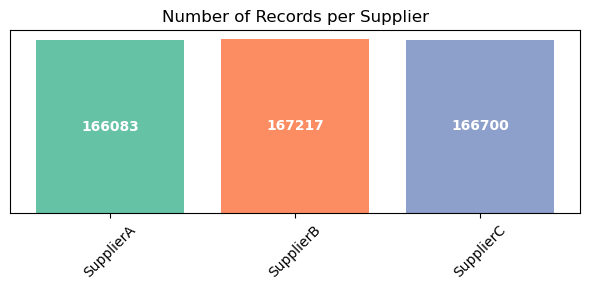

In [24]:
# Group and sort alphabetically
df_counts = df_density_report.group_by("SupplierName").agg([
    pl.len().alias("NumRecords")
])
df_counts_pd = df_counts.to_pandas().sort_values(by="SupplierName")

# Plot with different colors
colors = plt.cm.Set2.colors
plt.figure(figsize=(6, 3))
bars = plt.bar(df_counts_pd["SupplierName"], df_counts_pd["NumRecords"], color=colors[:len(df_counts_pd)])

# Add text *inside* bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 0.5, f"{int(height)}",
             ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Clean up
plt.title("Number of Records per Supplier")
plt.xticks(rotation=45)
plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

#### 2.4 Suppliers distribution over the time

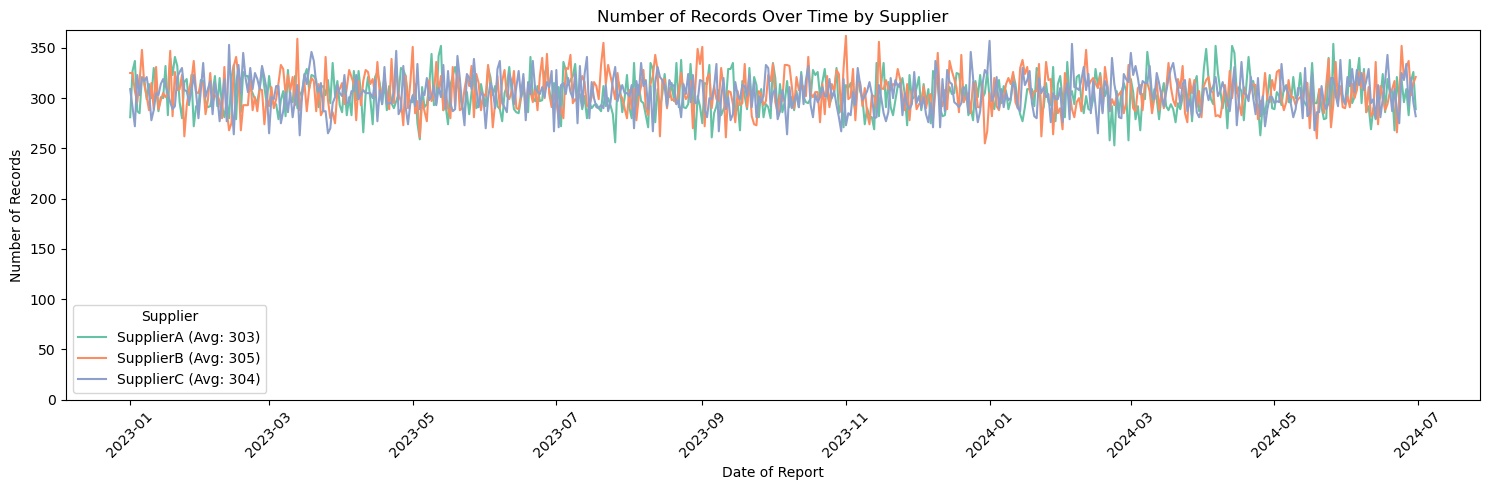

In [25]:
# Group by Date and Supplier, count
df_time_counts = df_density_report.group_by(["DateOfReport", "SupplierName"]).agg([
    pl.len().alias("NumRecords")
])

# Convert to pandas and pivot
df_time_pd = df_time_counts.to_pandas()
df_time_pivot = df_time_pd.pivot_table(index="DateOfReport", columns="SupplierName", values="NumRecords", fill_value=0)

# Sort by date
df_time_pivot = df_time_pivot.sort_index()

# Use same colors as before
supplier_names = df_time_pivot.columns.tolist()
colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(supplier_names)}

# Plot lines
plt.figure(figsize=(15, 5))
for supplier in supplier_names:
    avg = df_time_pivot[supplier].mean()
    label = f"{supplier} (Avg: {int(avg)})"
    plt.plot(df_time_pivot.index, df_time_pivot[supplier], label=label, color=color_map[supplier])

# Final touches
plt.title("Number of Records Over Time by Supplier")
plt.xlabel("Date of Report")
plt.ylabel("Number of Records")
plt.legend(title="Supplier")
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

#### 2.5 Garment distribution per supplier

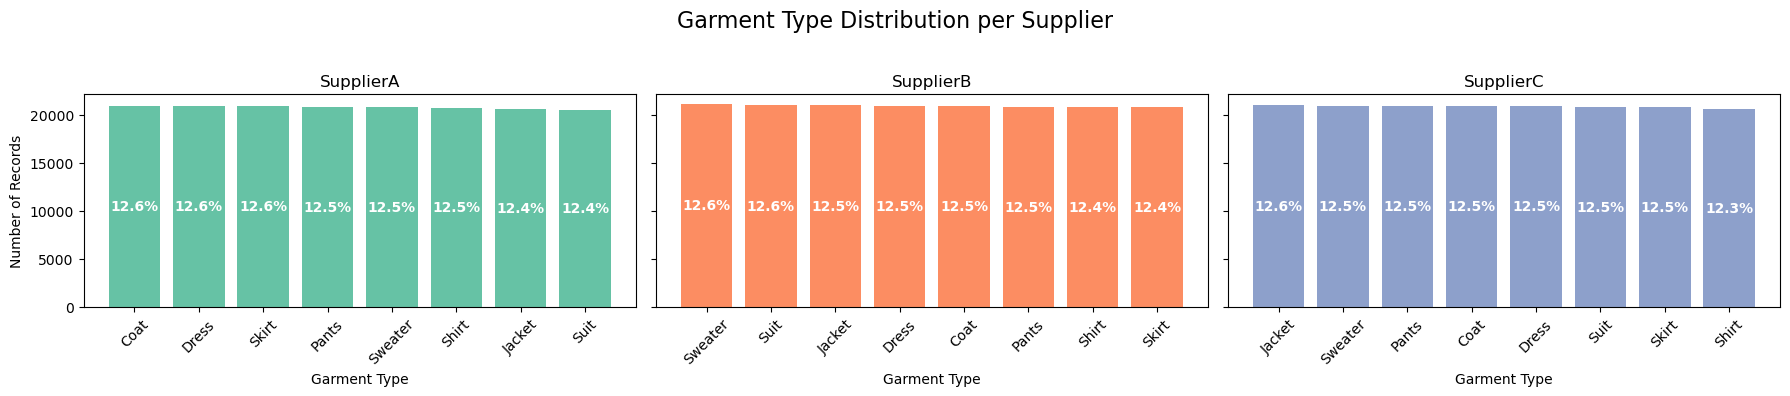

In [26]:
# Group by Supplier + GarmentType and count
df_garments = df_density_report.group_by(["SupplierName", "GarmentType"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Get total counts per supplier to compute percentages
total_counts = df_garments.groupby("SupplierName")["NumRecords"].sum().to_dict()

# Add percentage column
df_garments["Percentage"] = df_garments.apply(
    lambda row: row["NumRecords"] / total_counts[row["SupplierName"]] * 100, axis=1
)

# Prepare subplots
suppliers = sorted(df_garments["SupplierName"].unique())
num_suppliers = len(suppliers)

fig, axes = plt.subplots(1, num_suppliers, figsize=(6 * num_suppliers, 4), sharey=True)

colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(suppliers)}

# Plot for each supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_garments[df_garments["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)

    bars = ax.bar(data["GarmentType"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Garment Type")
    if i == 0:
        ax.set_ylabel("Number of Records")
    ax.tick_params(axis='x', rotation=45)

    # Add % labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Final formatting
plt.suptitle("Garment Type Distribution per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 2.6 Material distribution per supplier

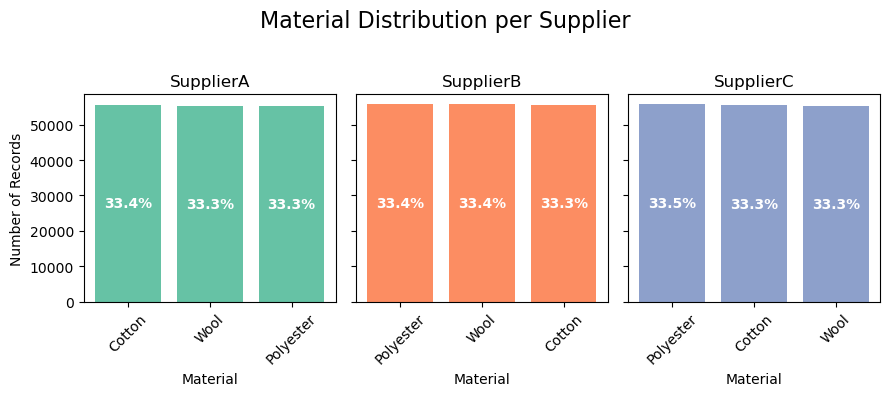

In [27]:
# Group by Supplier + Material and count
df_materials = df_density_report.group_by(["SupplierName", "Material"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Get total counts per supplier
total_counts = df_materials.groupby("SupplierName")["NumRecords"].sum().to_dict()

# Compute percentages
df_materials["Percentage"] = df_materials.apply(
    lambda row: row["NumRecords"] / total_counts[row["SupplierName"]] * 100, axis=1
)

# Step 4: Prepare subplots
suppliers = sorted(df_materials["SupplierName"].unique())
num_suppliers = len(suppliers)

fig, axes = plt.subplots(1, num_suppliers, figsize=(3 * num_suppliers, 4), sharey=True)

colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(suppliers)}

# Plot per supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_materials[df_materials["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)

    bars = ax.bar(data["Material"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Material")
    if i == 0:
        ax.set_ylabel("Number of Records")
    ax.tick_params(axis='x', rotation=45)

    # Add percentage labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Final layout
plt.suptitle("Material Distribution per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 2.6 Units proposed per garment

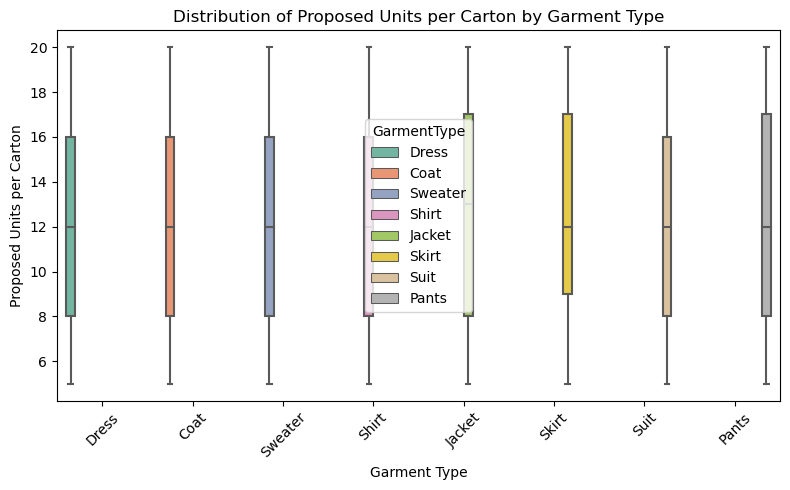

In [39]:
# Convert to pandas
df_box = df_density_report.select(["GarmentType", "ProposedUnitsPerCarton"]).to_pandas()

# Plot single boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="GarmentType",
    y="ProposedUnitsPerCarton",
    data=df_box,
    hue="GarmentType",
    palette="Set2"
)

plt.title("Distribution of Proposed Units per Carton by Garment Type")
plt.xlabel("Garment Type")
plt.ylabel("Proposed Units per Carton")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.7 Units proposed per folding method

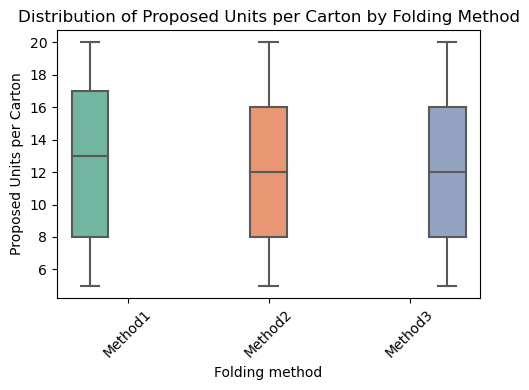

In [40]:
# Convert to pandas
df_box = df_density_report.select(["ProposedFoldingMethod", "ProposedUnitsPerCarton"]).to_pandas()

# Plot single boxplot
plt.figure(figsize=(5, 4))
sns.boxplot(
    x="ProposedFoldingMethod",
    y="ProposedUnitsPerCarton",
    data=df_box,
    hue="ProposedFoldingMethod",
    palette="Set2"
)
# Remove the legend explicitly if hue creates one automatically
plt.gca().get_legend().remove()


plt.title("Distribution of Proposed Units per Carton by Folding Method")
plt.xlabel("Folding method")
plt.ylabel("Proposed Units per Carton")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.8 Units proposed per layout

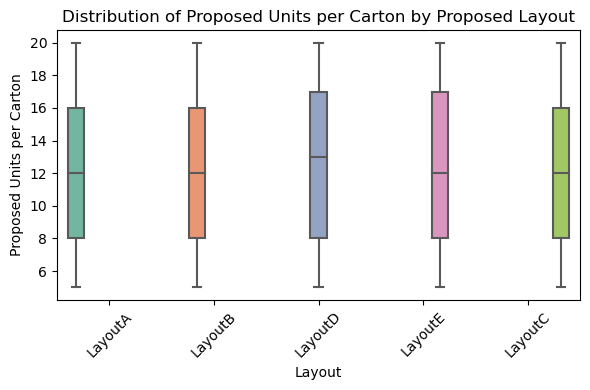

In [42]:
# Convert to pandas
df_box = df_density_report.select(["ProposedLayout", "ProposedUnitsPerCarton"]).to_pandas()

# Plot single boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="ProposedLayout",
    y="ProposedUnitsPerCarton",
    data=df_box,
    hue="ProposedLayout",
    palette="Set2"
)

# Remove the legend explicitly if hue creates one automatically
if plt.gca().get_legend() is not None:
    plt.gca().get_legend().remove()

plt.title("Distribution of Proposed Units per Carton by Proposed Layout")
plt.xlabel("Layout")
plt.ylabel("Proposed Units per Carton")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 2.9 Packing quality per supplier

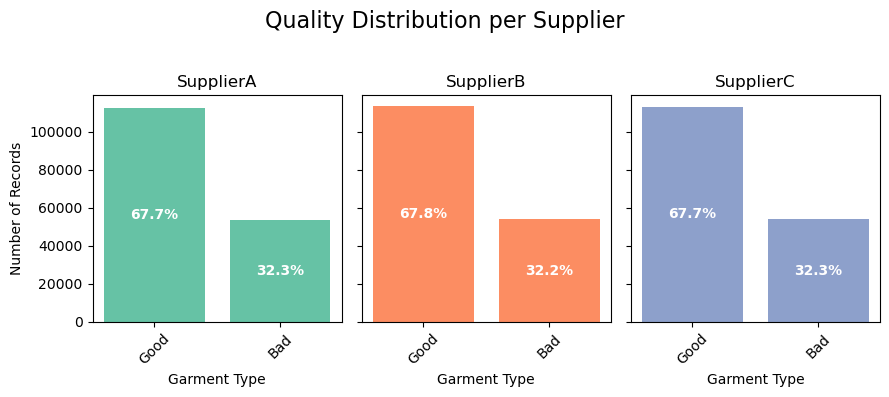

In [31]:
# Group by Supplier + PackagingQuality and count
df_garments = df_density_report.group_by(["SupplierName", "PackagingQuality"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Get total counts per supplier to compute percentages
total_counts = df_garments.groupby("SupplierName")["NumRecords"].sum().to_dict()

# Add percentage column
df_garments["Percentage"] = df_garments.apply(
    lambda row: row["NumRecords"] / total_counts[row["SupplierName"]] * 100, axis=1
)

# Prepare subplots
suppliers = sorted(df_garments["SupplierName"].unique())
num_suppliers = len(suppliers)

fig, axes = plt.subplots(1, num_suppliers, figsize=(3 * num_suppliers, 4), sharey=True)

colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(suppliers)}

# Plot for each supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_garments[df_garments["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)

    bars = ax.bar(data["PackagingQuality"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Garment Type")
    if i == 0:
        ax.set_ylabel("Number of Records")
    ax.tick_params(axis='x', rotation=45)

    # Add % labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Final formatting
plt.suptitle("Quality Distribution per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 3. Historical incidents

#### 3.1 Data preview

In [32]:
df_historical_incidents.head(10)

IncidentID,DateOfIncident,SupplierName,ProductReference,IssueDescription,ResolutionStatus,CostImpact
i64,date,str,str,str,str,f64
1,2023-06-29,"""SupplierC""","""SHI-POL-7646""","""Incorrect units""","""In Progress""",516.77
2,2023-03-25,"""SupplierA""","""DRE-POL-2824""","""Incorrect units""","""In Progress""",368.65
3,2024-03-16,"""SupplierB""","""SKI-WOO-4511""","""Damaged product""","""In Progress""",784.42
4,2023-03-22,"""SupplierB""","""COA-WOO-7770""","""Damaged product""","""In Progress""",770.32
5,2023-08-14,"""SupplierC""","""SHI-POL-5504""","""Packaging error""","""In Progress""",140.48
6,2023-02-13,"""SupplierB""","""SKI-WOO-7753""","""Delayed shipment""","""Resolved""",779.74
7,2024-05-02,"""SupplierB""","""SKI-POL-9549""","""Packaging error""","""Resolved""",313.97
8,2024-05-20,"""SupplierB""","""DRE-WOO-1250""","""Incorrect units""","""Resolved""",740.45
9,2024-04-25,"""SupplierA""","""PAN-WOO-7082""","""Delayed shipment""","""Pending""",271.73


#### 3.2 Data basic summary

In [33]:
df_historical_incidents.describe()

statistic,IncidentID,DateOfIncident,SupplierName,ProductReference,IssueDescription,ResolutionStatus,CostImpact
str,f64,str,str,str,str,str,f64
"""count""",10000.0,"""10000""","""10000""","""10000""","""10000""","""10000""",10000.0
"""null_count""",0.0,"""0""","""0""","""0""","""0""","""0""",0.0
"""mean""",5000.5,"""2023-09-30 12:15:24.480000""",null,null,null,null,547.69505
"""std""",2886.89568,null,null,null,null,null,259.216493
"""min""",1.0,"""2023-01-01""","""SupplierA""","""COA-COT-1050""","""Damaged product""","""In Progress""",100.02
"""25%""",2501.0,"""2023-05-17""",null,null,null,null,320.8
"""50%""",5001.0,"""2023-09-29""",null,null,null,null,545.05
"""75%""",7500.0,"""2024-02-15""",null,null,null,null,768.76
"""max""",10000.0,"""2024-06-30""","""SupplierC""","""SWE-WOO-9993""","""Packaging error""","""Resolved""",999.89


#### 3.3 Suppliers distribution

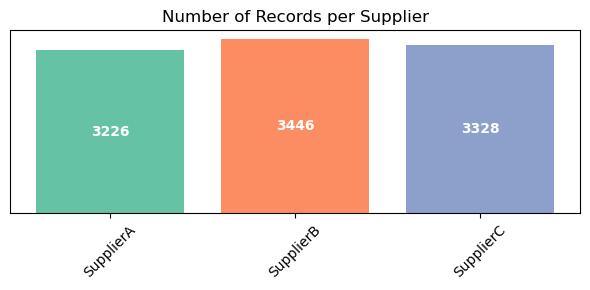

In [34]:
# Group and sort alphabetically
df_counts = df_historical_incidents.group_by("SupplierName").agg([
    pl.len().alias("NumRecords")
])
df_counts_pd = df_counts.to_pandas().sort_values(by="SupplierName")

# Plot with different colors
colors = plt.cm.Set2.colors
plt.figure(figsize=(6, 3))
bars = plt.bar(df_counts_pd["SupplierName"], df_counts_pd["NumRecords"], color=colors[:len(df_counts_pd)])

# Add text *inside* bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 0.5, f"{int(height)}",
             ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Clean up
plt.title("Number of Records per Supplier")
plt.xticks(rotation=45)
plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

#### 3.4 Suppliers distribution over the time

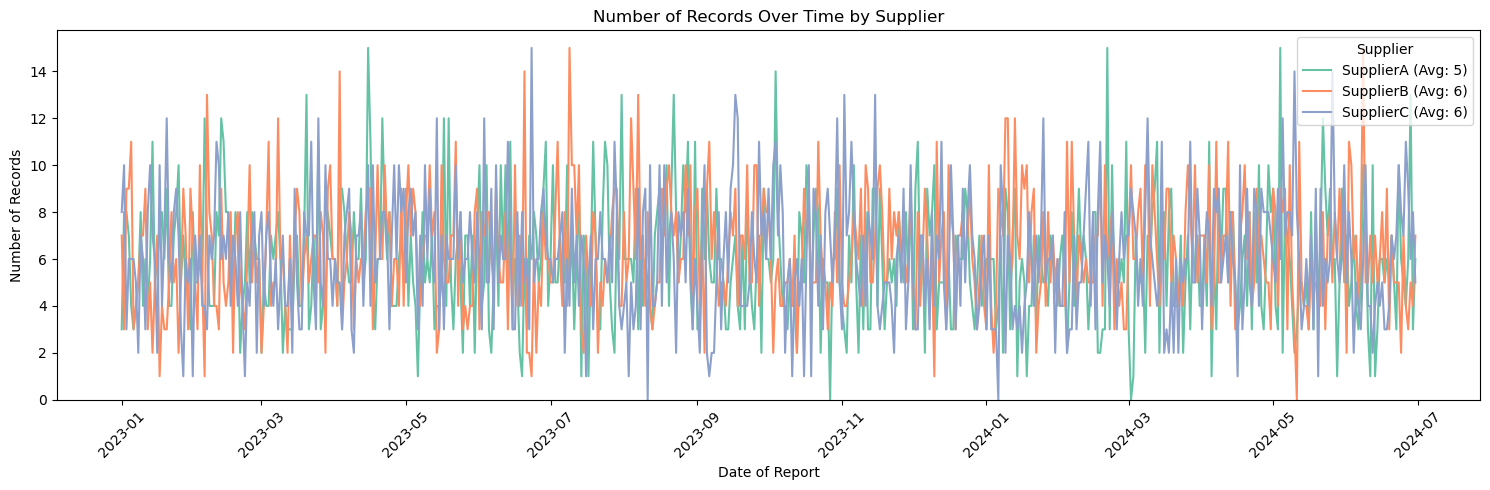

In [35]:
# Group by Date and Supplier, count
df_time_counts = df_historical_incidents.group_by(["DateOfIncident", "SupplierName"]).agg([
    pl.len().alias("NumRecords")
])

# Convert to pandas and pivot
df_time_pd = df_time_counts.to_pandas()
df_time_pivot = df_time_pd.pivot_table(index="DateOfIncident", columns="SupplierName", values="NumRecords", fill_value=0)

# Sort by date
df_time_pivot = df_time_pivot.sort_index()

# Use same colors as before
supplier_names = df_time_pivot.columns.tolist()
colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(supplier_names)}

# Plot lines
plt.figure(figsize=(15, 5))
for supplier in supplier_names:
    avg = df_time_pivot[supplier].mean()
    label = f"{supplier} (Avg: {int(avg)})"
    plt.plot(df_time_pivot.index, df_time_pivot[supplier], label=label, color=color_map[supplier])

# Final touches
plt.title("Number of Records Over Time by Supplier")
plt.xlabel("Date of Report")
plt.ylabel("Number of Records")
plt.legend(title="Supplier")
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

#### 3.5 Incident types per supplier

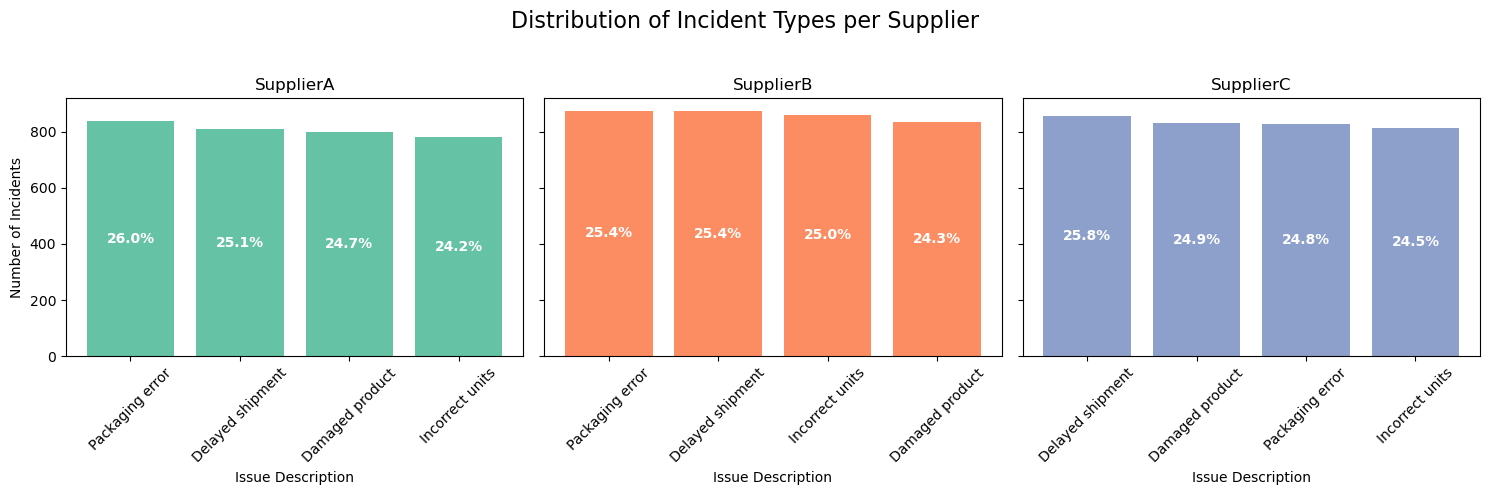

In [36]:
# Group by Supplier + IssueDescription and count
df_issues = df_historical_incidents.group_by(["SupplierName", "IssueDescription"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Calculate total per supplier to get % values
total_issues = df_issues.groupby("SupplierName")["NumRecords"].sum().to_dict()
df_issues["Percentage"] = df_issues.apply(
    lambda row: row["NumRecords"] / total_issues[row["SupplierName"]] * 100, axis=1
)

# Prepare subplots
suppliers = sorted(df_issues["SupplierName"].unique())
num_suppliers = len(suppliers)

fig, axes = plt.subplots(1, num_suppliers, figsize=(5 * num_suppliers, 5), sharey=True)

colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(suppliers)}

# Plot per supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_issues[df_issues["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)

    bars = ax.bar(data["IssueDescription"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Issue Description")
    if i == 0:
        ax.set_ylabel("Number of Incidents")
    ax.tick_params(axis='x', rotation=45)

    # Add percentage labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Final layout
plt.suptitle("Distribution of Incident Types per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 3.6 Status per supplier

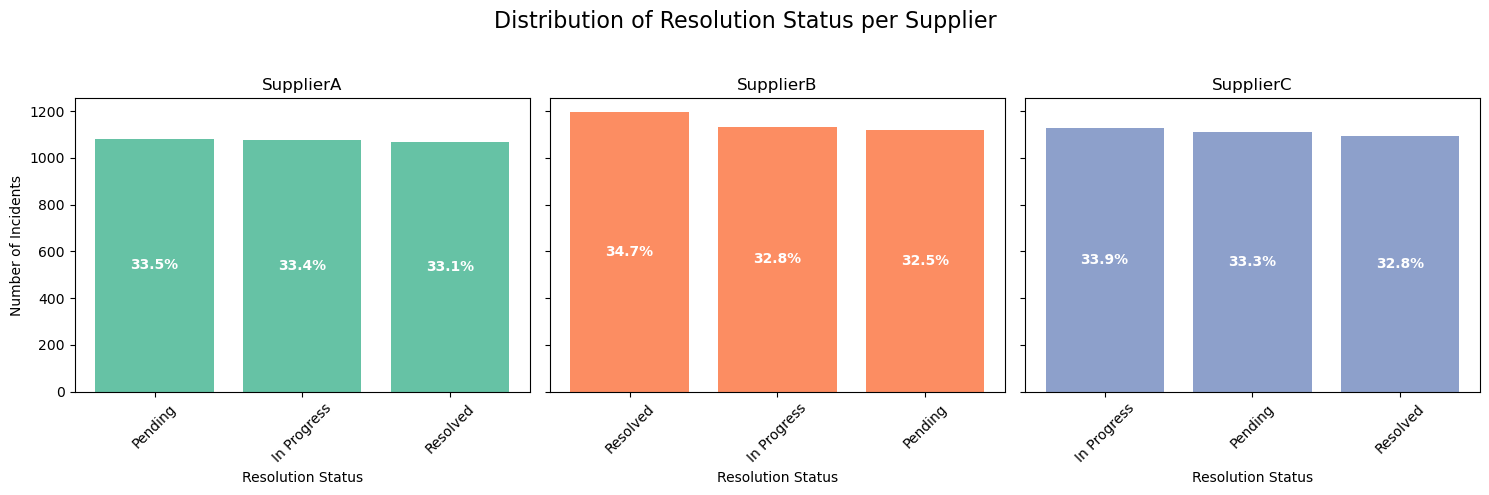

In [37]:
# Group by Supplier + ResolutionStatus and count
df_resolution = df_historical_incidents.group_by(["SupplierName", "ResolutionStatus"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()

# Calculate total per supplier
total_by_supplier = df_resolution.groupby("SupplierName")["NumRecords"].sum().to_dict()
df_resolution["Percentage"] = df_resolution.apply(
    lambda row: row["NumRecords"] / total_by_supplier[row["SupplierName"]] * 100, axis=1
)

# Set up subplots
suppliers = sorted(df_resolution["SupplierName"].unique())
num_suppliers = len(suppliers)

fig, axes = plt.subplots(1, num_suppliers, figsize=(5 * num_suppliers, 5), sharey=True)

colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(suppliers)}

# Plot per supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_resolution[df_resolution["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)

    bars = ax.bar(data["ResolutionStatus"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Resolution Status")
    if i == 0:
        ax.set_ylabel("Number of Incidents")
    ax.tick_params(axis='x', rotation=45)

    # Add percentage labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Final formatting
plt.suptitle("Distribution of Resolution Status per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 3.7 Cost impact by supplier

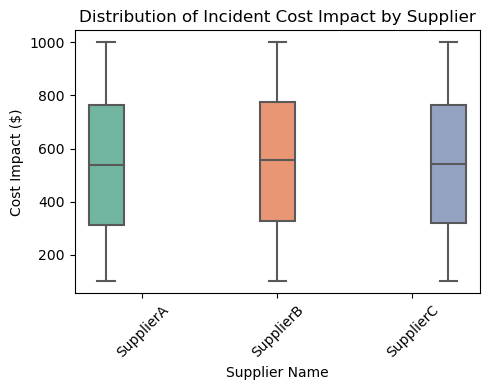

In [43]:
# Convert to pandas and sort alphabetically by SupplierName
df_cost = df_historical_incidents.select(["SupplierName", "CostImpact"]).to_pandas()
df_cost = df_cost.sort_values(by="SupplierName")

# Get sorted supplier list for consistent order in boxplot
supplier_order = sorted(df_cost["SupplierName"].unique())

# Plot boxplot with custom order
plt.figure(figsize=(5, 4))
sns.boxplot(
    x="SupplierName",
    y="CostImpact",
    data=df_cost,
    order=supplier_order,
    hue="SupplierName",
    palette="Set2"
)

# Remove the legend explicitly if hue creates one automatically
if plt.gca().get_legend() is not None:
    plt.gca().get_legend().remove()

# Labels and layout
plt.title("Distribution of Incident Cost Impact by Supplier")
plt.xlabel("Supplier Name")
plt.ylabel("Cost Impact ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Supplier Scorecard

#### 4.1 Data preview

In [ ]:
df_supplier_scorecard.head(10)

SupplierName,ReportDate,AdherenceScore,NumberOfReminders,OnTimeDelivery,CostSavings
str,date,i64,i64,str,f64
"""SupplierB""",2024-05-30,70,0,"""Yes""",3349.32
"""SupplierB""",2023-04-23,54,5,"""Yes""",4006.58
"""SupplierC""",2023-02-01,99,1,"""Yes""",737.58
"""SupplierC""",2024-05-05,69,5,"""No""",3211.89
"""SupplierB""",2023-10-03,68,0,"""Yes""",2302.41
"""SupplierC""",2024-04-14,82,0,"""Yes""",3232.31
"""SupplierB""",2024-06-01,87,3,"""Yes""",2959.92
"""SupplierA""",2023-12-30,75,1,"""Yes""",3179.75
"""SupplierA""",2024-05-23,91,2,"""Yes""",1989.16


#### 4.2 Data basic summary

In [45]:
df_supplier_scorecard.describe()

statistic,SupplierName,ReportDate,AdherenceScore,NumberOfReminders,OnTimeDelivery,CostSavings
str,str,str,f64,f64,str,f64
"""count""","""10000""","""10000""",10000.0,10000.0,"""10000""",10000.0
"""null_count""","""0""","""0""",0.0,0.0,"""0""",0.0
"""mean""",null,"""2023-09-30 12:24:02.880000""",75.0915,2.5182,null,2754.948713
"""std""",null,null,14.703141,1.706212,null,1296.358335
"""min""","""SupplierA""","""2023-01-01""",50.0,0.0,"""No""",500.47
"""25%""",null,"""2023-05-18""",62.0,1.0,null,1629.73
"""50%""",null,"""2023-10-01""",75.0,3.0,null,2757.98
"""75%""",null,"""2024-02-14""",88.0,4.0,null,3886.49
"""max""","""SupplierC""","""2024-06-30""",100.0,5.0,"""Yes""",4998.54


#### 4.3 Suppliers distribution

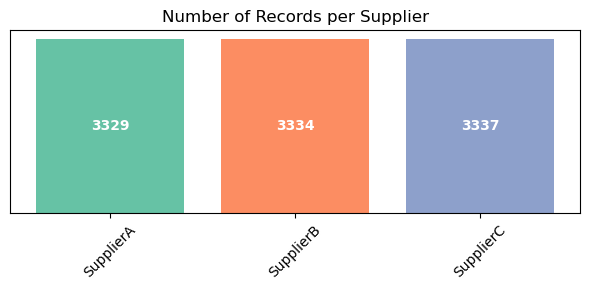

In [46]:
# Group and sort alphabetically
df_counts_supplier = df_supplier_scorecard.group_by("SupplierName").agg([
    pl.len().alias("NumRecords")
])
df_counts_supplier_pd = df_counts_supplier.to_pandas().sort_values(by="SupplierName")

# Plot with different colors
colors = plt.cm.Set2.colors
plt.figure(figsize=(6, 3))
bars = plt.bar(df_counts_supplier_pd["SupplierName"], df_counts_supplier_pd["NumRecords"], color=colors[:len(df_counts_supplier_pd)])

# Add text *inside* bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height * 0.5, f"{int(height)}",
             ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Clean up
plt.title("Number of Records per Supplier")
plt.xticks(rotation=45)
plt.gca().axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

#### 4.4 On time delivery by supplier

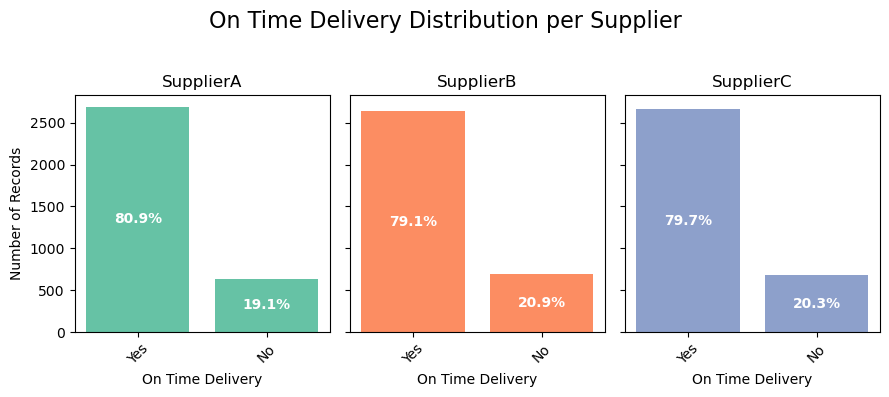

In [66]:
# check the binary column of ontime delievery to see how many time each supplier was on time and how many times they were not
df_ontime = df_supplier_scorecard.group_by(["SupplierName", "OnTimeDelivery"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()
# Get total counts per supplier to compute percentages
total_counts = df_ontime.groupby("SupplierName")["NumRecords"].sum().to_dict()
# Add percentage column
df_ontime["Percentage"] = df_ontime.apply(
    lambda row: row["NumRecords"] / total_counts[row["SupplierName"]] * 100, axis=1
)
# Prepare subplots
suppliers = sorted(df_ontime["SupplierName"].unique())
num_suppliers = len(suppliers)
fig, axes = plt.subplots(1, num_suppliers, figsize=(3 * num_suppliers, 4), sharey=True)
colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(suppliers)}
# Plot for each supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_ontime[df_ontime["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)
    bars = ax.bar(data["OnTimeDelivery"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("On Time Delivery")
    if i == 0:
        ax.set_ylabel("Number of Records")
    ax.tick_params(axis='x', rotation=45)
    # Add % labels inside bars
    for bar, pct in zip(bars, data["Percentage"]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5, f"{pct:.1f}%",
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')
# Final formatting
plt.suptitle("On Time Delivery Distribution per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### 4.5 Adherence score by Supplier 

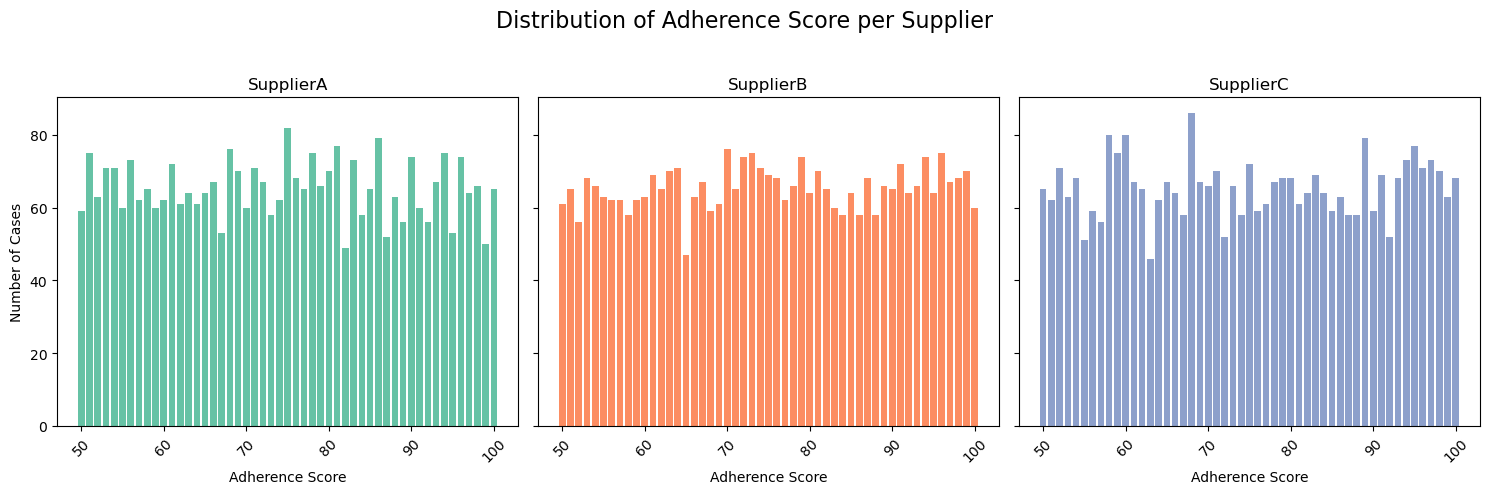

Average Adherence Score per Supplier:
SupplierName  AvgAdherenceScore
   SupplierB          75.281344
   SupplierC          75.168415
   SupplierA          74.824272


In [ ]:
#adherence score by supplier
df_adherence = df_supplier_scorecard.group_by(["SupplierName", "AdherenceScore"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()
# Calculate total per supplier
total_adherence = df_adherence.groupby("SupplierName")["NumRecords"].sum().to_dict()
df_adherence["Percentage"] = df_adherence.apply(
    lambda row: row["NumRecords"] / total_adherence[row["SupplierName"]] * 100, axis=1
)
# Set up subplots
suppliers = sorted(df_adherence["SupplierName"].unique())
num_suppliers = len(suppliers)
fig, axes = plt.subplots(1, num_suppliers, figsize=(5 * num_suppliers, 5), sharey=True)
colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(suppliers)}
# Plot per supplier

for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_adherence[df_adherence["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)
    bars = ax.bar(data["AdherenceScore"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Adherence Score")
    if i == 0:
        ax.set_ylabel("Number of Cases")
    ax.tick_params(axis='x', rotation=45)
# Final layout
plt.suptitle("Distribution of Adherence Score per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#average adherence score per supplier in text
df_adherence_avg = df_supplier_scorecard.group_by(["SupplierName"]).agg([
    pl.mean("AdherenceScore").alias("AvgAdherenceScore")
]).to_pandas()
df_adherence_avg = df_adherence_avg.sort_values(by="AvgAdherenceScore", ascending=False)
print("Average Adherence Score per Supplier:")
print(df_adherence_avg.to_string(index=False))

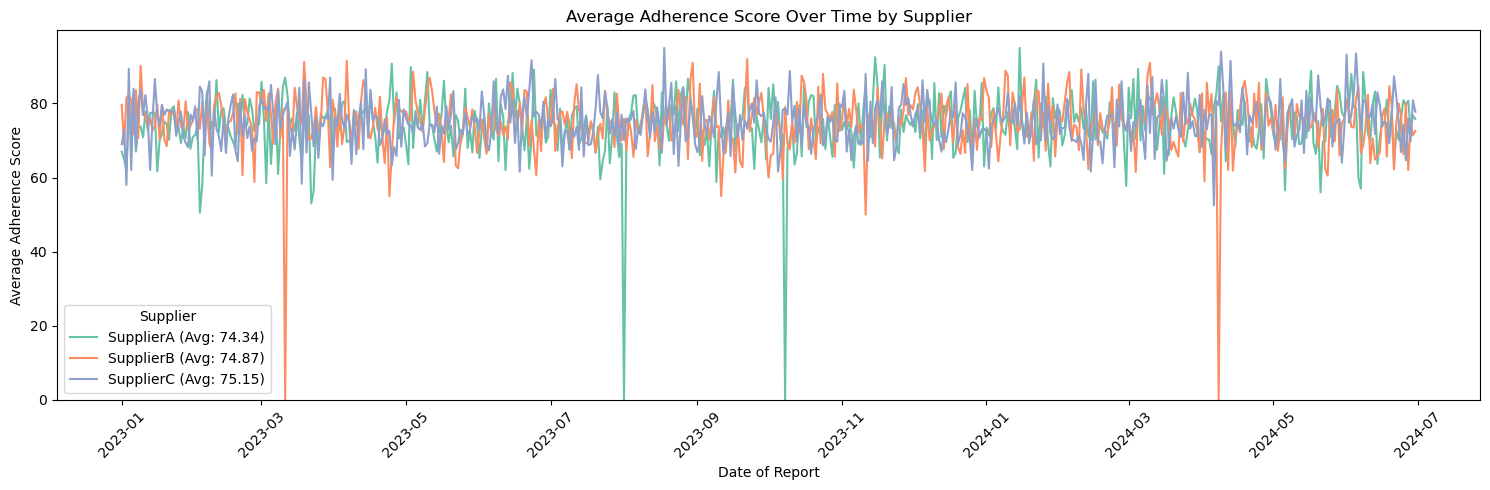

In [56]:
#adherence score by supplier over time
df_time_adherence = df_supplier_scorecard.group_by(["ReportDate", "SupplierName"]).agg([
    pl.mean("AdherenceScore").alias("AvgAdherenceScore")
]).to_pandas()
# Convert ReportDate to datetime
df_time_adherence["ReportDate"] = pd.to_datetime(df_time_adherence["ReportDate"])
# Pivot the DataFrame
df_time_pivot_adherence = df_time_adherence.pivot_table(index="ReportDate", columns="SupplierName", values="AvgAdherenceScore", fill_value=0)
# Sort by date
df_time_pivot_adherence = df_time_pivot_adherence.sort_index()
# Use same colors as before
supplier_names = df_time_pivot_adherence.columns.tolist()
colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(supplier_names)}
# Plot lines
plt.figure(figsize=(15, 5))
for supplier in supplier_names:
    avg = df_time_pivot_adherence[supplier].mean()
    label = f"{supplier} (Avg: {avg:.2f})"
    plt.plot(df_time_pivot_adherence.index, df_time_pivot_adherence[supplier], label=label, color=color_map[supplier])
# Final touches
plt.title("Average Adherence Score Over Time by Supplier")
plt.xlabel("Date of Report")
plt.ylabel("Average Adherence Score")
plt.legend(title="Supplier")
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

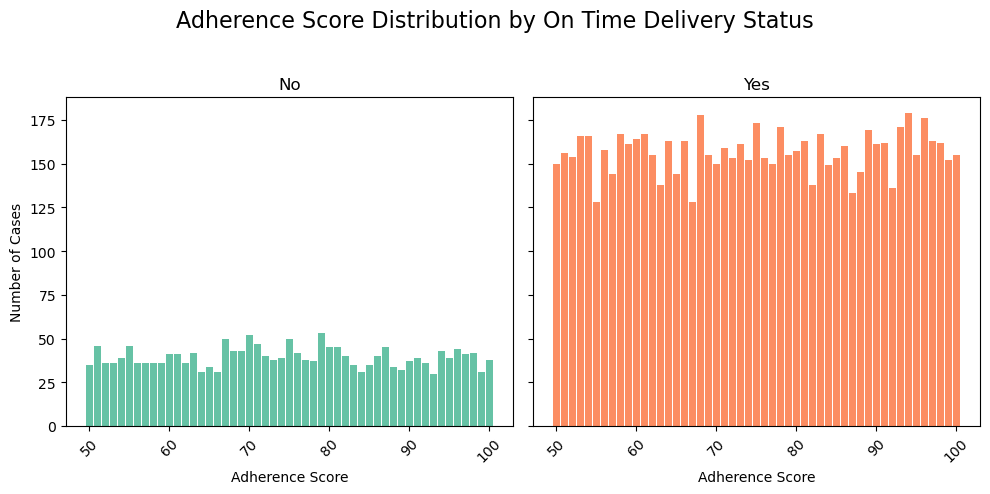

Average Adherence Score by On Time Delivery Status:
OnTimeDelivery  AvgAdherenceScore
           Yes          75.141087
            No          74.894632


In [72]:
#adherence score when supplier was on time vs when they were not
df_adherence_ontime = df_supplier_scorecard.group_by(["OnTimeDelivery", "AdherenceScore"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()
# Calculate total per ontime delivery status
total_adherence_ontime = df_adherence_ontime.groupby("OnTimeDelivery")["NumRecords"].sum().to_dict()
df_adherence_ontime["Percentage"] = df_adherence_ontime.apply(
    lambda row: row["NumRecords"] / total_adherence_ontime[row["OnTimeDelivery"]] * 100, axis=1
)
# Set up subplots
ontime_status = sorted(df_adherence_ontime["OnTimeDelivery"].unique())
num_ontime_status = len(ontime_status)
fig, axes = plt.subplots(1, num_ontime_status, figsize=(5 * num_ontime_status, 5), sharey=True)
colors = plt.cm.Set2.colors
color_map = {status: colors[i] for i, status in enumerate(ontime_status)}
# Plot per ontime delivery status
for i, status in enumerate(ontime_status):
    ax = axes[i] if num_ontime_status > 1 else axes
    data = df_adherence_ontime[df_adherence_ontime["OnTimeDelivery"] == status].sort_values("NumRecords", ascending=False)
    bars = ax.bar(data["AdherenceScore"], data["NumRecords"], color=color_map[status])
    ax.set_title(status)
    ax.set_xlabel("Adherence Score")
    if i == 0:
        ax.set_ylabel("Number of Cases")
    ax.tick_params(axis='x', rotation=45)
# Final layout
plt.suptitle("Adherence Score Distribution by On Time Delivery Status", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#average adherence score when supplier was on time vs when they were not
df_adherence_ontime_avg = df_supplier_scorecard.group_by(["OnTimeDelivery"]).agg([
    pl.mean("AdherenceScore").alias("AvgAdherenceScore")
]).to_pandas()
df_adherence_ontime_avg = df_adherence_ontime_avg.sort_values(by="AvgAdherenceScore", ascending=False)
print("Average Adherence Score by On Time Delivery Status:")
print(df_adherence_ontime_avg.to_string(index=False))



#### 4.6 Number of reminders by Supplier 

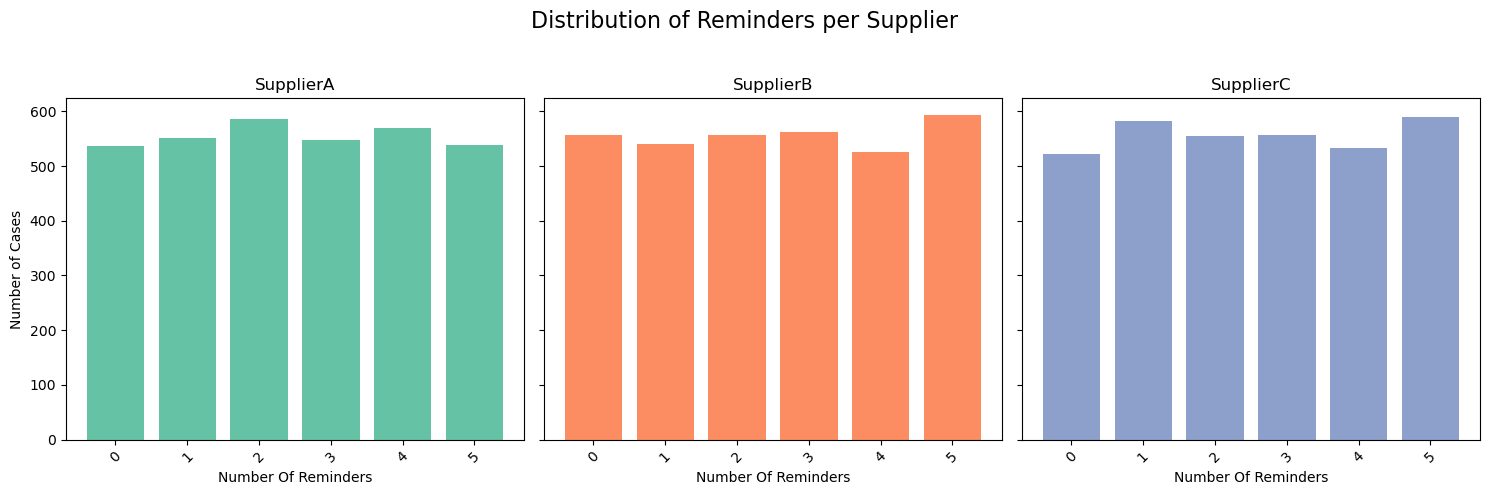

Average Number of Reminders per Supplier:
SupplierName  AvgNumberOfReminders
   SupplierC              2.528319
   SupplierB              2.522795
   SupplierA              2.503454
Total Number of Reminders per Supplier:
SupplierName  TotalNumberOfReminders
   SupplierC                    8437
   SupplierB                    8411
   SupplierA                    8334


In [70]:
#reminders by supplier
df_reminders = df_supplier_scorecard.group_by(["SupplierName", "NumberOfReminders"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()
# Calculate total per supplier
total_reminders = df_reminders.groupby("SupplierName")["NumRecords"].sum().to_dict()
df_reminders["Percentage"] = df_reminders.apply(
    lambda row: row["NumRecords"] / total_reminders[row["SupplierName"]] * 100, axis=1
)
# Set up subplots
suppliers = sorted(df_reminders["SupplierName"].unique())
num_suppliers = len(suppliers)
fig, axes = plt.subplots(1, num_suppliers, figsize=(5 * num_suppliers, 5), sharey=True)
colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(suppliers)}
# Plot per supplier
for i, supplier in enumerate(suppliers):
    ax = axes[i] if num_suppliers > 1 else axes
    data = df_reminders[df_reminders["SupplierName"] == supplier].sort_values("NumRecords", ascending=False)
    bars = ax.bar(data["NumberOfReminders"], data["NumRecords"], color=color_map[supplier])
    ax.set_title(supplier)
    ax.set_xlabel("Number Of Reminders")
    if i == 0:
        ax.set_ylabel("Number of Cases")
    ax.tick_params(axis='x', rotation=45)
# Final layout
plt.suptitle("Distribution of Reminders per Supplier", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#avc number of reminders by supplier
df_reminders_avg = df_supplier_scorecard.group_by(["SupplierName"]).agg([
    pl.mean("NumberOfReminders").alias("AvgNumberOfReminders")
]).to_pandas()
df_reminders_avg = df_reminders_avg.sort_values(by="AvgNumberOfReminders", ascending=False)
print("Average Number of Reminders per Supplier:")
print(df_reminders_avg.to_string(index=False))

#print total number of reminders per supplier
df_reminders_total = df_supplier_scorecard.group_by(["SupplierName"]).agg([
    pl.sum("NumberOfReminders").alias("TotalNumberOfReminders")
]).to_pandas()
df_reminders_total = df_reminders_total.sort_values(by="TotalNumberOfReminders", ascending=False)
print("Total Number of Reminders per Supplier:")
print(df_reminders_total.to_string(index=False))


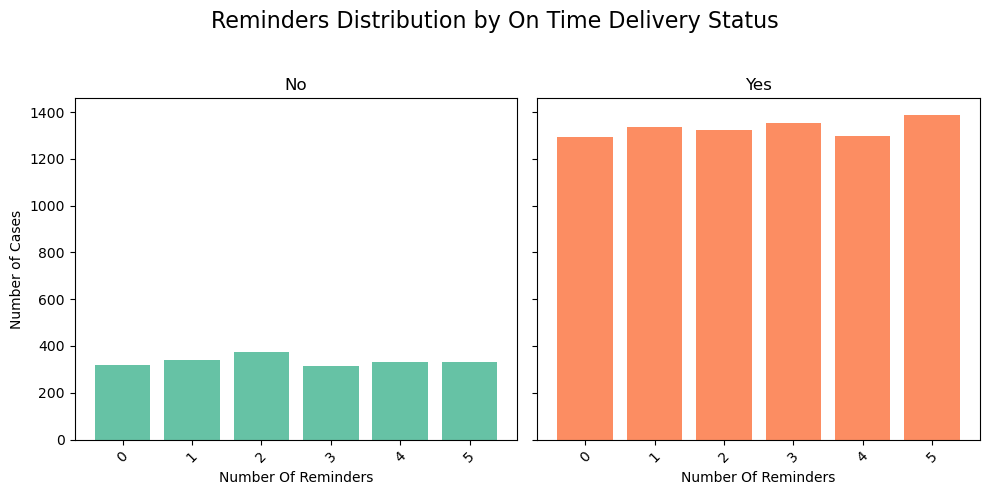

Average Number of Reminders when On Time vs Not On Time:
OnTimeDelivery  AvgNumberOfReminders
           Yes              2.524412
            No              2.493539
Total Number of Reminders when On Time vs Not On Time:
OnTimeDelivery  TotalNumberOfReminders
           Yes                   20165
            No                    5017


In [71]:
# reminders by supllier when on time vs when not on time
df_reminders_ontime = df_supplier_scorecard.group_by(["OnTimeDelivery", "NumberOfReminders"]).agg([
    pl.len().alias("NumRecords")
]).to_pandas()
# Calculate total per ontime delivery status
total_reminders_ontime = df_reminders_ontime.groupby("OnTimeDelivery")["NumRecords"].sum().to_dict()
df_reminders_ontime["Percentage"] = df_reminders_ontime.apply(
    lambda row: row["NumRecords"] / total_reminders_ontime[row["OnTimeDelivery"]] * 100, axis=1
)
# Set up subplots
ontime_status = sorted(df_reminders_ontime["OnTimeDelivery"].unique())
num_ontime_status = len(ontime_status)
fig, axes = plt.subplots(1, num_ontime_status, figsize=(5 * num_ontime_status, 5), sharey=True)
colors = plt.cm.Set2.colors
color_map = {status: colors[i] for i, status in enumerate(ontime_status)}
# Plot per ontime delivery status
for i, status in enumerate(ontime_status):
    ax = axes[i] if num_ontime_status > 1 else axes
    data = df_reminders_ontime[df_reminders_ontime["OnTimeDelivery"] == status].sort_values("NumRecords", ascending=False)
    bars = ax.bar(data["NumberOfReminders"], data["NumRecords"], color=color_map[status])
    ax.set_title(status)
    ax.set_xlabel("Number Of Reminders")
    if i == 0:
        ax.set_ylabel("Number of Cases")
    ax.tick_params(axis='x', rotation=45)
# Final layout
plt.suptitle("Reminders Distribution by On Time Delivery Status", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
#average number of reminders when on time vs when not on time
df_reminders_ontime_avg = df_supplier_scorecard.group_by(["OnTimeDelivery"]).agg([
    pl.mean("NumberOfReminders").alias("AvgNumberOfReminders")
]).to_pandas()
df_reminders_ontime_avg = df_reminders_ontime_avg.sort_values(by="AvgNumberOfReminders", ascending=False)
print("Average Number of Reminders when On Time vs Not On Time:")
print(df_reminders_ontime_avg.to_string(index=False))
#total number of reminders when on time vs when not on time
df_reminders_ontime_total = df_supplier_scorecard.group_by(["OnTimeDelivery"]).agg([
    pl.sum("NumberOfReminders").alias("TotalNumberOfReminders")
]).to_pandas()
df_reminders_ontime_total = df_reminders_ontime_total.sort_values(by="TotalNumberOfReminders", ascending=False)
print("Total Number of Reminders when On Time vs Not On Time:")
print(df_reminders_ontime_total.to_string(index=False))

 #### 4.7 Cost savings by Supplier 

In [64]:
#total cost savings by supplier
df_cost_savings = df_supplier_scorecard.group_by(["SupplierName"]).agg([
    pl.sum("CostSavings").alias("TotalCostSavings")
]).to_pandas()
df_cost_savings = df_cost_savings.sort_values(by="TotalCostSavings", ascending=False)
print("Total Cost Savings per Supplier:")
print(df_cost_savings.to_string(index=False))


Total Cost Savings per Supplier:
SupplierName  TotalCostSavings
   SupplierA        9318394.25
   SupplierC        9198225.43
   SupplierB        9032867.45


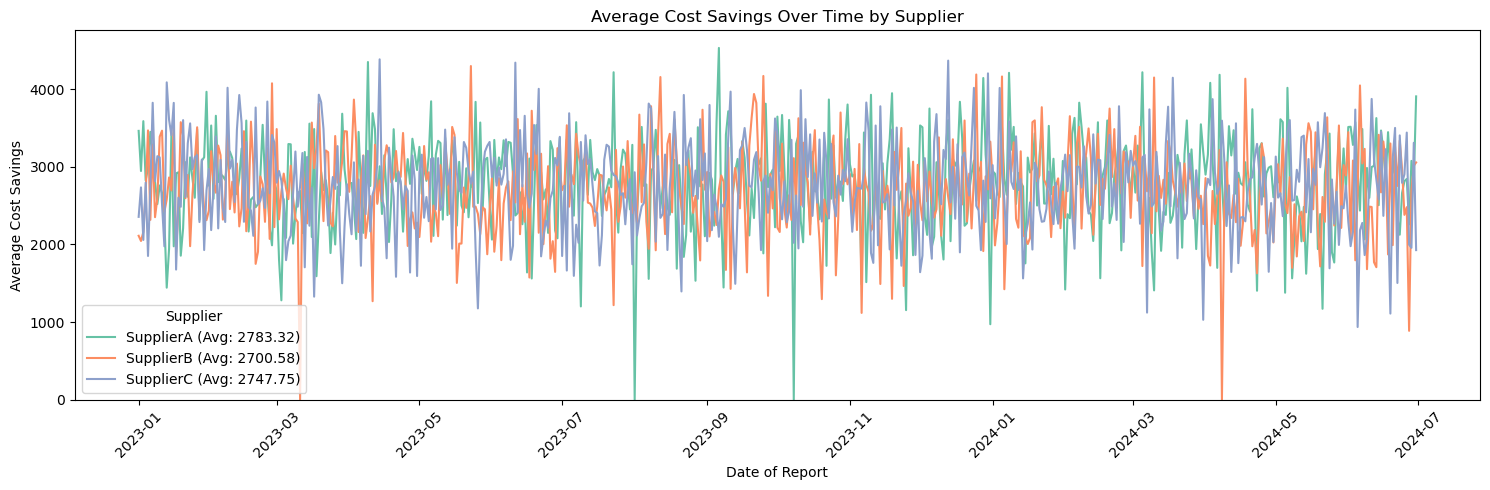

In [65]:
#cost savings by supplier over time
df_time_cost_savings = df_supplier_scorecard.group_by(["ReportDate", "SupplierName"]).agg([
    pl.mean("CostSavings").alias("AvgCostSavings")
]).to_pandas()
# Convert ReportDate to datetime
df_time_cost_savings["ReportDate"] = pd.to_datetime(df_time_cost_savings["ReportDate"])
# Pivot the DataFrame
df_time_pivot_cost_savings = df_time_cost_savings.pivot_table(index="ReportDate", columns="SupplierName", values="AvgCostSavings", fill_value=0)
# Sort by date
df_time_pivot_cost_savings = df_time_pivot_cost_savings.sort_index()
# Use same colors as before
supplier_names = df_time_pivot_cost_savings.columns.tolist()
colors = plt.cm.Set2.colors
color_map = {supplier: colors[i] for i, supplier in enumerate(supplier_names)}
# Plot lines
plt.figure(figsize=(15, 5))
for supplier in supplier_names:
    avg = df_time_pivot_cost_savings[supplier].mean()
    label = f"{supplier} (Avg: {avg:.2f})"
    plt.plot(df_time_pivot_cost_savings.index, df_time_pivot_cost_savings[supplier], label=label, color=color_map[supplier])
# Final touches
plt.title("Average Cost Savings Over Time by Supplier")
plt.xlabel("Date of Report")
plt.ylabel("Average Cost Savings")
plt.legend(title="Supplier")
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

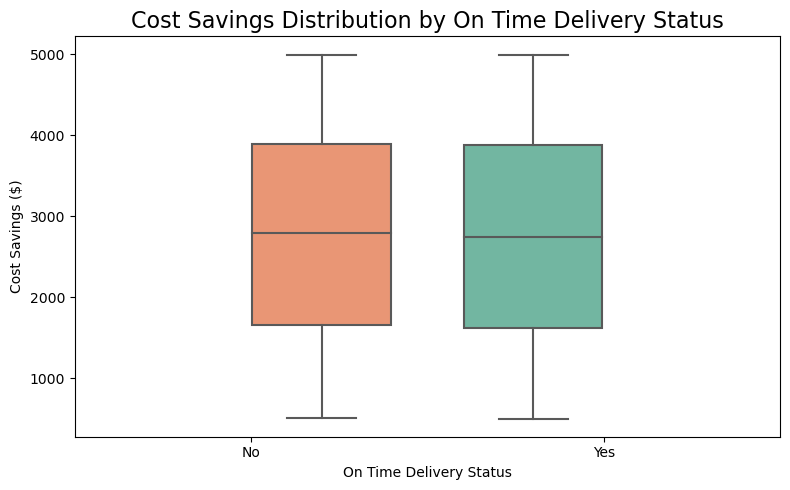

Average Cost Savings when On Time vs Not On Time:
OnTimeDelivery  AvgCostSavings
            No     2777.213936
           Yes     2749.340597
Total Cost Savings when On Time vs Not On Time:
OnTimeDelivery  TotalCostSavings
           Yes       21961732.69
            No        5587754.44


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl

# cost savings when supplier was on time vs when they were not

# Select relevant data for plotting
df_plot_data = df_supplier_scorecard.select(["OnTimeDelivery", "CostSavings"]).to_pandas()

# Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(
    x="OnTimeDelivery",
    y="CostSavings",
    data=df_plot_data,
    hue="OnTimeDelivery", # Use hue to get different colors per status
    palette="Set2",
    order=sorted(df_plot_data["OnTimeDelivery"].unique()) # Ensure consistent order
)

# Remove the legend if hue creates one automatically
if plt.gca().get_legend() is not None:
    plt.gca().get_legend().remove()

# Final layout
plt.title("Cost Savings Distribution by On Time Delivery Status", fontsize=16)
plt.xlabel("On Time Delivery Status")
plt.ylabel("Cost Savings ($)")
plt.xticks(rotation=0) # No need for rotation with only two categories
plt.tight_layout()
plt.show()

#average cost savings when supplier was on time vs when they were not
df_cost_savings_ontime_avg = df_supplier_scorecard.group_by(["OnTimeDelivery"]).agg([
    pl.mean("CostSavings").alias("AvgCostSavings")
]).to_pandas()
df_cost_savings_ontime_avg = df_cost_savings_ontime_avg.sort_values(by="AvgCostSavings", ascending=False)
print("Average Cost Savings when On Time vs Not On Time:")
print(df_cost_savings_ontime_avg.to_string(index=False))
#total cost savings when supplier was on time vs when they were not
df_cost_savings_ontime_total = df_supplier_scorecard.group_by(["OnTimeDelivery"]).agg([
    pl.sum("CostSavings").alias("TotalCostSavings")
]).to_pandas()
df_cost_savings_ontime_total = df_cost_savings_ontime_total.sort_values(by="TotalCostSavings", ascending=False)
print("Total Cost Savings when On Time vs Not On Time:")
print(df_cost_savings_ontime_total.to_string(index=False))